# What can we learn from the medical appointments in Brazil?

### 100k medical appointments in Brazil
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the questions
stated below. A number of
characteristics about the patient are
included in each row.
<li>‘ScheduledDay’ tells us on
what day the patient set up their
appointment.</li>
<li>‘Neighborhood’ indicates the
location of the hospital.</li>
<li>‘Scholarship’ indicates
whether or not the patient is
enrolled in Brazilian welfare
program Bolsa Família.</li>
<li>Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.</li>

### Questions to be answered on this verification
<ol>
    <li>Which gender mostly makes appointments?</li>
    <li>Are the number of appointments increasing over time?</li>
    <li>Which range of age mostly make appointments?
    <li>Which neighbourhood receives more patients?
    <li>Is there any correlation between people's age and some different illnesses?
    <li>Does the SMS notification help the patients to do not forget their appointments?
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#clean up data format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
# Deteleting all unmeaningful columns for this study
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [5]:
# replace spaces with underscores and labels with hyfhens
df = df.rename(columns=lambda x: x.strip().lower().replace("-", "_").replace("day", "_day"))

In [6]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
# Fixing date formats
df['appointment_day_date'] = pd.to_datetime(df['appointment_day']).dt.date
df['appointment_day_time'] = pd.to_datetime(df['appointment_day']).dt.time

In [8]:
# Deleting all left-over data
df.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)

In [9]:
df.shape

(110527, 12)

In [10]:
# Reorganizing the dataset
new_order = [10,11,0,1,2,9,3,4,5,6,7,8]
df = df[df.columns[new_order]]
df.head(1)

,appointment_day_date,appointment_day_time,gender,age,neighbourhood,no_show,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,2016-04-29,00:00:00,F,62,JARDIM DA PENHA,No,0,1,0,0,0,0


In [11]:
# Overall data consistency verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   appointment_day_date  110527 non-null  object
 1   appointment_day_time  110527 non-null  object
 2   gender                110527 non-null  object
 3   age                   110527 non-null  int64 
 4   neighbourhood         110527 non-null  object
 5   no_show               110527 non-null  object
 6   scholarship           110527 non-null  int64 
 7   hipertension          110527 non-null  int64 
 8   diabetes              110527 non-null  int64 
 9   alcoholism            110527 non-null  int64 
 10  handcap               110527 non-null  int64 
 11  sms_received          110527 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [12]:
# Looking for all unique values for all columns in order to spot any data entry error, inconsistent data or duplication such as Gender ['F', 'M', Male, mal, Mlaskasjwef]
for col in df:
    print('\033[1m' + col + '\033[0m')
    print('Unique values found: ' + str(df[col].nunique()))


appointment_day_date
Unique values found: 27
appointment_day_time
Unique values found: 1
gender
Unique values found: 2
age
Unique values found: 104
neighbourhood
Unique values found: 81
no_show
Unique values found: 2
scholarship
Unique values found: 2
hipertension
Unique values found: 2
diabetes
Unique values found: 2
alcoholism
Unique values found: 2
handcap
Unique values found: 5
sms_received
Unique values found: 2


In [13]:
#Data types verification
df.dtypes

appointment_day_date    object
appointment_day_time    object
gender                  object
age                      int64
neighbourhood           object
no_show                 object
scholarship              int64
hipertension             int64
diabetes                 int64
alcoholism               int64
handcap                  int64
sms_received             int64
dtype: object

In [14]:
# data table verification
df.head(2)

,appointment_day_date,appointment_day_time,gender,age,neighbourhood,no_show,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,2016-04-29,00:00:00,F,62,JARDIM DA PENHA,No,0,1,0,0,0,0
1,2016-04-29,00:00:00,M,56,JARDIM DA PENHA,No,0,0,0,0,0,0


## Exploratory Data Analysis



### Overview of the data set

In [15]:
# Numbers by gender
males_tot = df[(df['gender'] == "M")]
females_tot = df[(df['gender'] == "F")]

# Numbers of people that did not show up
males_abs_tot = df[(df.gender == 'M') & (df.no_show == 'Yes') ]
females_abs_tot = df[(df.gender == 'F') & (df.no_show == 'Yes') ]

# Total of appointments
tot_abs = df.age.count()

# Total of people that did not show up
df[df.no_show == 'No'].age.count()

print('Number of male appointments: ' + str(males_tot.age.count()))
print('Number of female appointments: ' + str(females_tot.age.count()))
print('Number of males that did not show up: ' + str(males_abs_tot.age.count()))
print('Number of female that did not show up: ' + str(females_abs_tot.age.count()))
print("Percentage of male's absence: " + str(females_abs_tot.age.count()))
print("Percentage of female's absence: " + str(females_abs_tot.age.count()))


Number of male appointments: 38687
Number of female appointments: 71840
Number of males that did not show up: 7725
Number of female that did not show up: 14594
Percentage of male's absence: 14594
Percentage of female's absence: 14594


### 1-Which gender mostly make appointments?

<AxesSubplot:ylabel='Gender'>

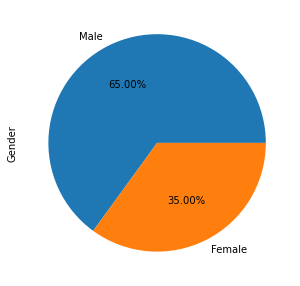

In [16]:
df.groupby('gender').size().plot(labels= ['Male','Female'], ylabel='Gender',kind='pie', autopct='%.2f%%', figsize=(10, 5))

### 2-Are the number of appointments increasing over time?


In [17]:
df_filt = df['appointment_day_date'].value_counts()
df_filt = df_filt.sort_values()

Text(0, 0.5, 'Appointments')

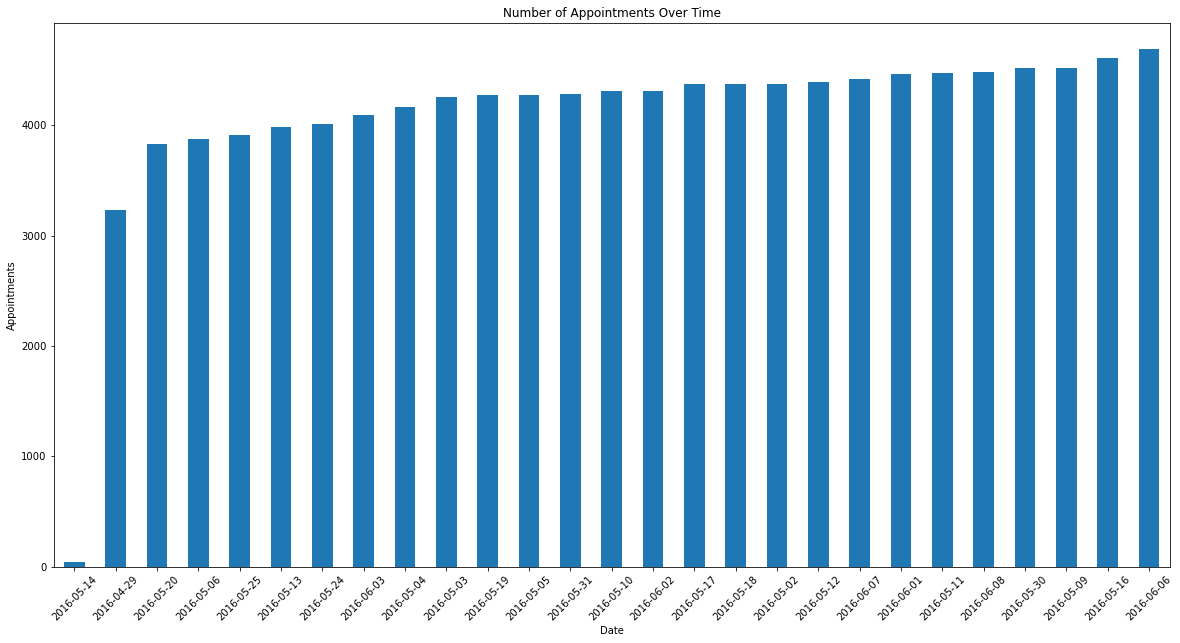

In [18]:
data_appoint = df_filt.plot.bar(y=df_filt, rot=45, figsize=(20,10))

plt.title("Number of Appointments Over Time")
plt.xlabel("Date")
plt.ylabel("Appointments")

### 3-Which range of age mostly make appointments?


In [19]:
conditions = [
    (df['age'] < 18),
    (df['age'] >= 18) & (df['age'] < 60),
    (df['age'] >= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['young', 'adult', 'elderly']

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_desc'] = np.select(conditions, values)

# display updated DataFrame
df.head(1)

,appointment_day_date,appointment_day_time,gender,age,neighbourhood,no_show,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,age_desc
0,2016-04-29,00:00:00,F,62,JARDIM DA PENHA,No,0,1,0,0,0,0,elderly


<AxesSubplot:title={'center':'Age range that mostly make appointments'}>

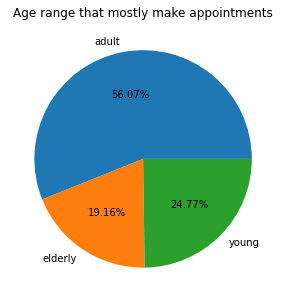

In [20]:
df.groupby('age_desc').size().plot(kind='pie', label='', title='Age range that mostly make appointments', autopct='%.2f%%', figsize=(10, 5))


### 4-Which neighbourhood mostly receives patients?

In [21]:
df.neighbourhood.describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

### 5-Is there any correlation between people's age and some different illnesses?


/Users/jonathansouza/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


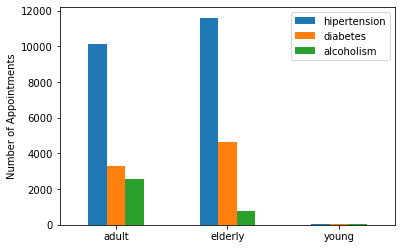

In [22]:
df_group = df.groupby('age_desc')['hipertension','diabetes','alcoholism'].sum()
df_group = df_group.plot(kind='bar', label='', rot='0').set(xlabel="", ylabel="Number of Appointments")

/Users/jonathansouza/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0.5, 0, ''), Text(0, 0.5, 'Number of No Show Appointments')]

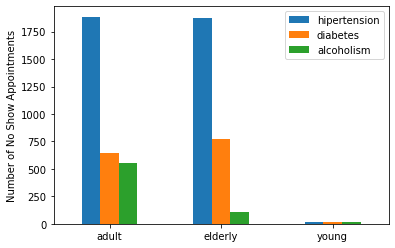

In [23]:
# Verification of any possible correlation with the absence and comparison against the previous chart
no_show = df[df['no_show'].str.contains("Yes")]
df_group_no_show = no_show.groupby('age_desc')['hipertension','diabetes','alcoholism'].sum()
df_group_no_show.plot(kind='bar', label='', rot='0').set(xlabel="", ylabel="Number of No Show Appointments")

### 6-Does the SMS notification help the patients to do not forget their appointments?

In [24]:
df_sms = df.query('sms_received in ["1"]')
df_sms.head(1)

,appointment_day_date,appointment_day_time,gender,age,neighbourhood,no_show,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,age_desc
11,2016-04-29,00:00:00,M,29,NOVA PALESTINA,Yes,0,0,0,0,0,1,adult


<AxesSubplot:title={'center':'SMS Confirmation Efficiency'}, ylabel=' '>

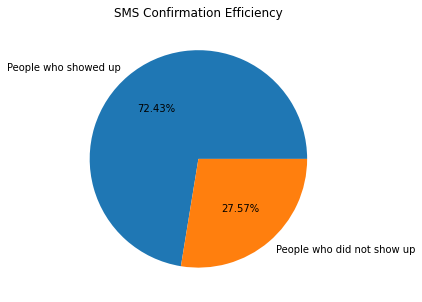

In [25]:
labels = ['People who showed up', 'People who did not show up']
df_sms.groupby('no_show').size().plot(kind='pie', label=' ', labels=labels, title='SMS Confirmation Efficiency', autopct='%.2f%%', figsize=(10, 5))

### Conclusions

### 1- Which gender mostly make appointments?
Males
### 2- Are the number of appointments increasing over time?
Yes
### 3- Which range of age mostly make appointments?
Adults which represent 56% of appointments made in the data range available.
### 4- Which neighbourhood mostly receives patients?
Jardim Camburi
### 5- Is there any correlation between people's age and some different illnesses?
- Hipertension and diabetis are mostly often visible in erderly people.
- Alcoholism is more common in the adult range.
- None of the available illnesses are common in young people.
- There is no correlation between the type of the health complications that the patient has with their absence in the appointments.

### 6- Does the SMS notification help the patients to do not forget their appointments?
People who receive a SMS notification of their appointment tend to show up.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255